In [8]:
from pylab import *
from sklearn import cross_validation, tree
from toolbox_02450 import feature_selector_lr, bmplot
import sklearn.linear_model as lm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np


#print plots inline
%matplotlib inline

#Define names
names = ['word_freq_make', 'word_freq_address', 'word_freq_all',
         'word_freq_3d', 'word_freq_our', 'word_freq_over',
         'word_freq_remove', 'word_freq_internet', 'word_freq_order',
         'word_freq_mail', 'word_freq_receive', 'word_freq_will',
         'word_freq_people', 'word_freq_report', 'word_freq_addresses',
         'word_freq_free', 'word_freq_business', 'word_freq_email',
         'word_freq_you', 'word_freq_credit', 'word_freq_your',
         'word_freq_font', 'word_freq_000', 'word_freq_money',
         'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
         'word_freq_650', 'word_freq_lab', 'word_freq_labs',
         'word_freq_telnet', 'word_freq_857', 'word_freq_data',
         'word_freq_415', 'word_freq_85', 'word_freq_technology',
         'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
         'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
         'word_freq_original', 'word_freq_project', 'word_freq_re',
         'word_freq_edu', 'word_freq_table', 'word_freq_conference',
         'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
         'char_freq_$', 'char_freq_#']
tst=['capital_run_length_average', 'capital_run_length_longest',
     'capital_run_length_total']

#clean up names
names=[s.replace('word_freq_','').replace('char_freq_','') for s in names]

#Load data
freq = pd.read_csv("../data/spambase.data",names=names,usecols=range(54))
Y = pd.read_csv("../data/spambase.data",usecols=[57],names=['spam'])

freq.head()


,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000


In [9]:
fff= 12
loss=0.27
#Get data and standardize
df = pd.read_csv("../data/spambase.data",names=names+tst,usecols=range(57))
Xc = (df - df.mean()) / (df.max() - df.min())
Xf=Xc.iloc[:,:fff]
Xd = asmatrix(Xf)
yd = Y.spam.values
X = np.asmatrix(Xd)
y = np.asmatrix(yd).T

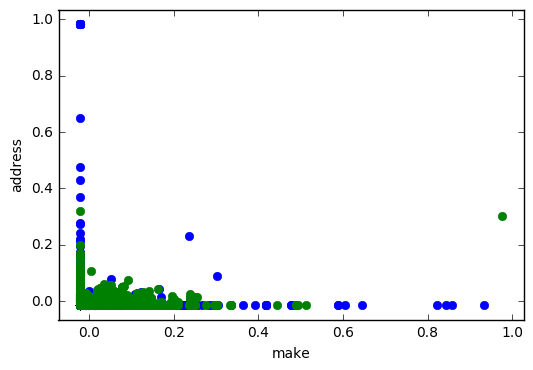

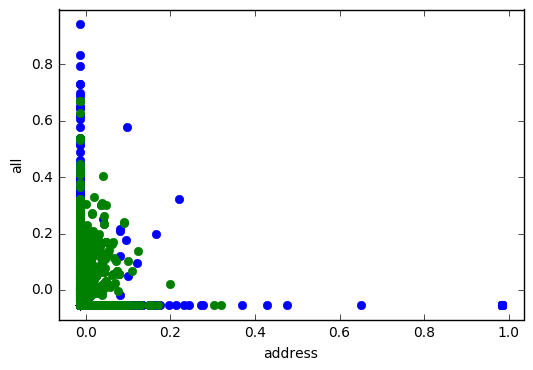

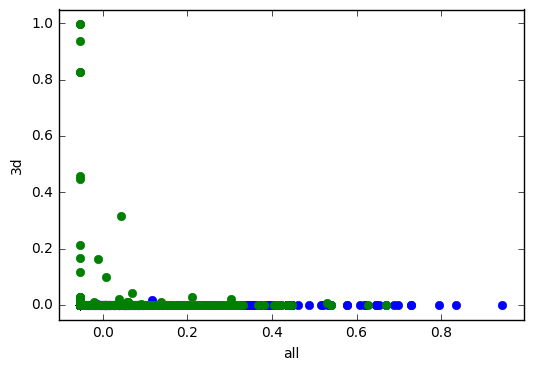

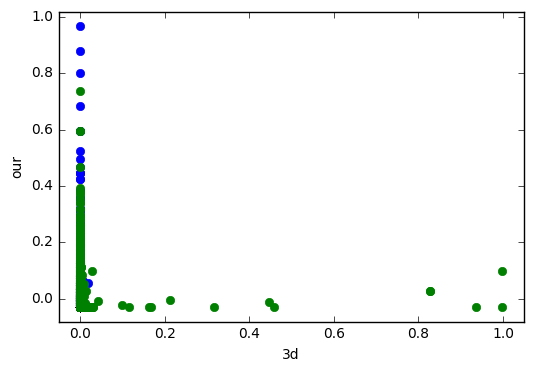

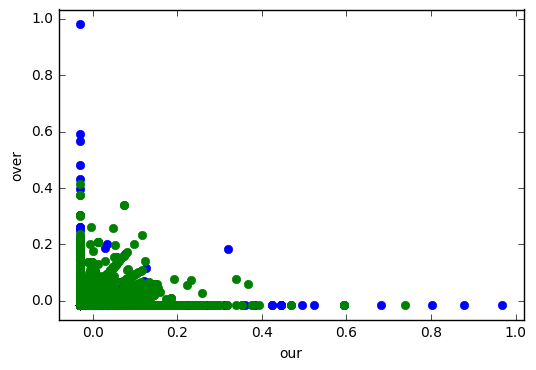

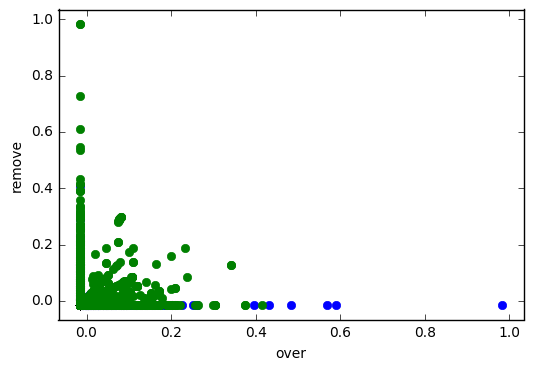

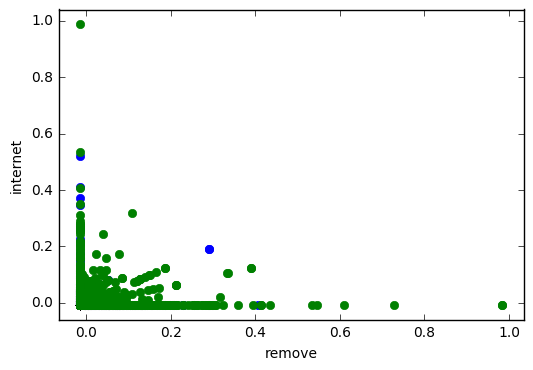

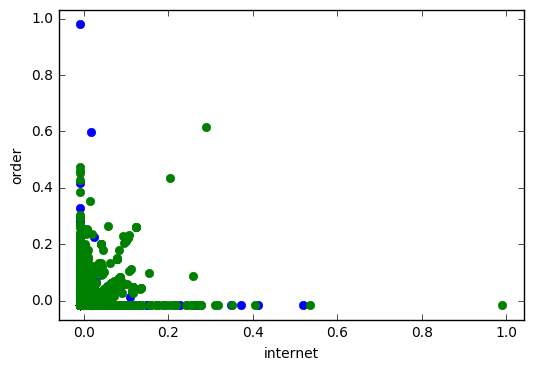

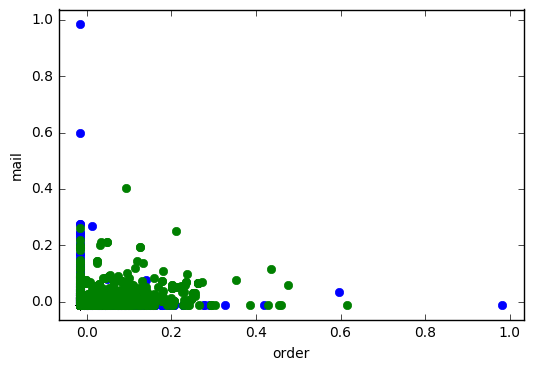

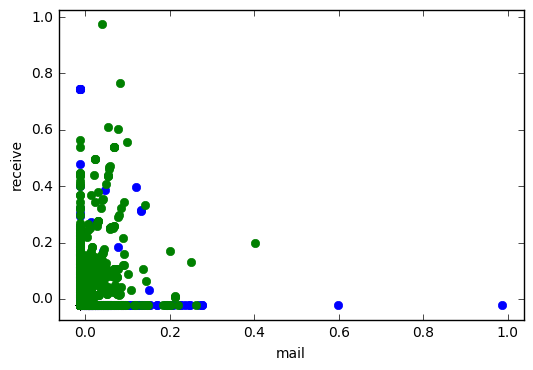

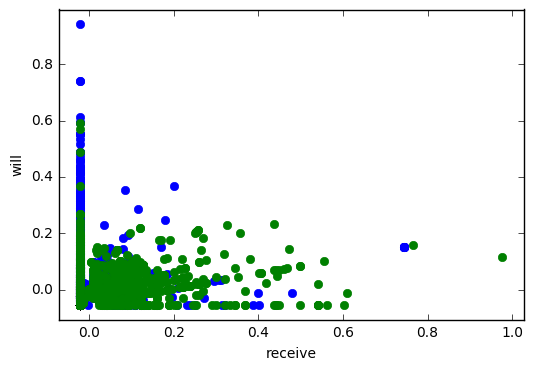

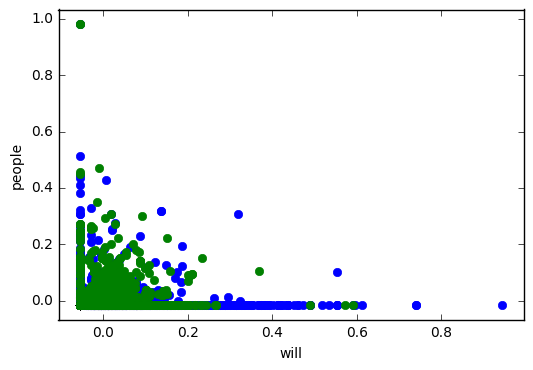

In [10]:
val=0
for i in range(12):
    X1=Xc.iloc[:,val]
    X2=Xc.iloc[:,val+1]
    spam=Y.iloc[:,0]
    df = pd.DataFrame(dict(x=X1, y=X2, label=spam))
    df.head()
# Plot original data and the model output
    groups = df.groupby('label')
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
    nx=names[val]
    ny=names[val+1]
    plt.xlabel(nx)
    plt.ylabel(ny)
    plt.savefig('img/'+nx+'_'+ny+'.pdf')
    plt.show()
    val+=1

In [11]:
#attributeNames = [name[0] for name in names]
#classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
# Add offset attribute
X = np.concatenate((np.ones((X.shape[0],1)),X),1)
attributeNames = [u'Offset']+names[:fff]
M = M+1

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = cross_validation.KFold(N,K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k = 0
best_error = 1e32
best_k = 0
best_loss = []
best_rec = []
best_selected_features = []


In [12]:
for train_index, test_index in CV:
    # extract training and test set for current CV fold
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    internal_cross_validation = 10

    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train - y_train.mean()).sum() / y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test - y_test.mean()).sum() / y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression().fit(X_train, y_train)
    Error_train[k] = np.square(y_train - m.predict(X_train)).sum() / y_train.shape[0]
    Error_test[k] = np.square(y_test - m.predict(X_test)).sum() / y_test.shape[0]

    # Compute squared error with feature subset selection
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,loss_record=[loss])
    Features[selected_features, k] = 1
    # .. alternatively you could use module sklearn.feature_selection
    print(selected_features)
    m = lm.LinearRegression().fit(X_train[:, selected_features], y_train)
    Error_train_fs[k] = np.square(y_train - m.predict(X_train[:, selected_features])).sum() / y_train.shape[0]
    Error_test_fs[k] = np.square(y_test - m.predict(X_test[:, selected_features])).sum() / y_test.shape[0]

#    print('Test error for ', k, ': ', Error_test_fs[k])

    if Error_test_fs[k] < best_error:
        best_error = Error_test_fs[k]
        best_k = k
        best_loss = loss_record
        best_rec = features_record
        best_selected_features = selected_features

    print('Cross validation fold {0}/{1}'.format(k + 1, K))
    # print('Train indices: {0}'.format(train_index))
    # print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k += 1

0.27
0.292978119546
0.2879234113
0.321243209577
0.280562634117
0.293761672427
0.274051389584
0.277246587159
0.256303884101
0.278378831893
0.275163124548
0.28775878912
0.275418518729
0.293415210505
0.256303884101
0.256303884101
0.251528376203
0.272309596963
0.245943242956
0.257701198509
0.245018076307
0.243661988823
0.243392843683
0.241180570121
0.252841508912
0.246073123107
0.256724506468
0.241180570121
0.241180570121
0.237937747905
0.252492181479
0.233142075925
0.241585849273
0.23031442554
0.231235868204
0.230961032806
0.239192991039
0.233933114923
0.241568806276
0.23031442554
0.23031442554
0.227328328366
0.239684336871
0.223735499597
0.231043088711
0.221300337471
0.220625671927
0.228484751396
0.223740187183
0.230676395668
0.220625671927
0.220625671927
0.21752021436
0.229722808496
0.214097062235
0.221543653419
0.212684996877
0.219412436379
0.215626406982
0.220983901957
0.212684996877
0.212684996877
0.210020749389
0.221721181571
0.207019954376
0.213294552241
0.211413583871
0.2079045815

[[ 0.49048349  0.6846355   1.15821316  1.63109634  2.51099317  2.07859368
   1.23703241  0.95823367  0.66004511 -0.27889184]]


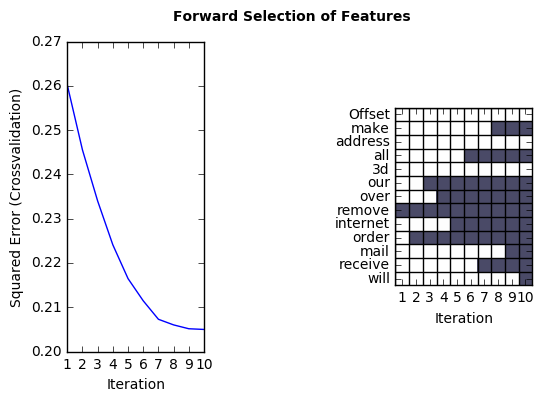

In [10]:
def plot_feature_selection(loss, attribute_names, feature_records):
    figure()
    suptitle('Forward Selection of Features', fontweight='bold')

    subplot(1, 3, 1)
    plot(range(1, len(loss)), loss[1:])
    locs, labels = xticks()
    xticks(locs, map(lambda x: "%1.0f" % x, locs))
    xlabel('Iteration')
    ylabel('Squared Error (Crossvalidation)')

    subplot(1, 3, 3)
    bmplot(attribute_names, range(1, feature_records.shape[1]), -feature_records[:, 1:])
    clim(-1.5, 0)
    xlabel('Iteration')
    savefig('img/best_forward_selection.pdf')

plot_feature_selection(best_loss, attributeNames, best_rec)
print(m.coef_)



Linear regression without feature selection:

- Training error: 0.16732012167533716
- Test error:     0.16900301858110398
- R^2 train:     0.2992358659556224
- R^2 test:     0.29090681416627057
Linear regression with feature selection:

- Training error: 0.16811966295733702
- Test error:     0.16978358153533119
- R^2 train:     0.2958872558273048
- R^2 test:     0.2876317728291176


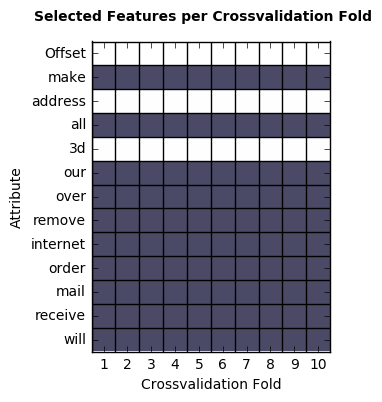

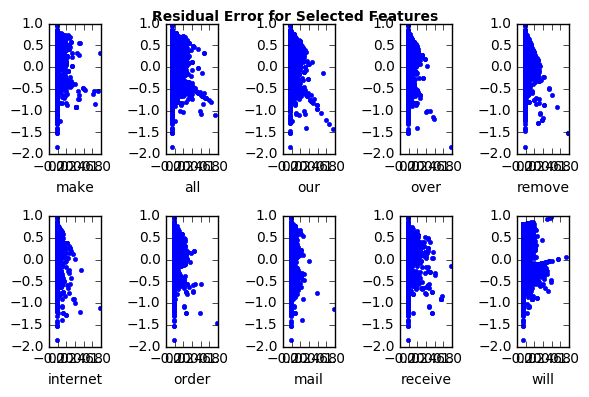

In [11]:
# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum() - Error_train.sum()) / Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum() - Error_test.sum()) / Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum() - Error_train_fs.sum()) / Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum() - Error_test_fs.sum()) / Error_test_nofeatures.sum()))

figure(k)
#subplot(1, 3, 2)
suptitle('Selected Features per Crossvalidation Fold', fontweight='bold')
bmplot(attributeNames, range(1, Features.shape[1] + 1), -Features)
clim(-1.5, 0)
xlabel('Crossvalidation Fold')
ylabel('Attribute')
savefig('img/linear_k_fold.pdf')

# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual
for f in range(best_k, best_k+1):
    # f = 2  # cross-validation fold to inspect
    ff = Features[:, f - 1].nonzero()[0]
    m = lm.LinearRegression().fit(X[:, ff], y)

    y_est = m.predict(X[:, ff])
    residual = y - y_est

    figure(k + f)
    figsize=(10,4)
    suptitle('Residual Error for Selected Features', fontweight='bold')
    for i in range(0, 5):
        subplot(2, ceil(len(ff) / 2.0), i + 1)
        plot(X[:, ff[i]], residual, '.')
        xlabel(attributeNames[ff[i]])
        tight_layout()
        savefig('img/residual_error.pdf')
        
    for i in range(5, len(ff)):
        subplot(2, ceil(len(ff) / 2.0), i + 1)
        plot(X[:, ff[i]], residual, '.')
        xlabel(attributeNames[ff[i]])
        tight_layout()
        savefig('img/residual_error.pdf')
    
show()

In [12]:
o=np.ones((1,10))
m.coef_

array([[ 0.49663238,  0.68021833,  1.22929675,  1.65278094,  2.32891064,
         1.9154441 ,  1.27543638,  0.94125344,  0.71884986, -0.24892443]])

## 